<a href="https://colab.research.google.com/github/Alchemist21/3Dportfolio/blob/main/Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
df = pd.read_csv('adult24.csv')
df.head()

,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,PPSU,PSTRAT,WLKLEISTC_A,WLKTRANTC_A,HISPALLP_A,RACEALLP_A,ANYDIFF_A,DISAB3_A,NUMBRN1TC_A,K6SPD_A,SCHDYMSSTC_A,AFNOW,REPWRKDYTC_A,YRSINUS_A,CITZNSTP_A,PRTNREDUCP_A,SPOUSEDUCP_A,LEGMSTAT_A,MARSTAT_A,SASPPRACE_A,SASPPHISP_A,PRTNRAGETC_A,SPOUSAGETC_A,PRTNRWKFT_A,PRTNRWRK_A,SPOUSWKFT_A,SPOUSWRK_A,SPOUSESEX_A,PRTNRSEX_A,INJWRKDYTC_A,NUMINJTC_A,SHINGYEARP_A,PROXYREL2_A,PROXYFLAG_A,HHRESPSA_FLG,PCNTADWFP1_A,PCNTADWKP1_A,...,ANXEV_A,DEMENEV_A,ARTHEV_A,COPDEV_A,DIBTYPE_A,DIBGLP_A,DIBINSSTYR_A,DIBINSSTOP_A,DIBINSTIME_A,DIBINS_A,DIBPILL_A,DIBEV_A,GESDIB_A,PREDIB_A,CANEV_A,ASER12M_A,ASAT12M_A,ASTILL_A,ASEV_A,STREV_A,MIEV_A,ANGEV_A,CHDEV_A,CHLMED_A,CHL12M_A,CHLEV_A,HYPMED_A,HYP12M_A,HYPDIF_A,HYPEV_A,LSATIS4_A,PHSTAT_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,AVGNUMCIG_A,WTFA_A,HHX,POVRATTC_A
0,9,0,2,2,122,NaN,NaN,2,1,2,2,NaN,2,NaN,2.0,NaN,NaN,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,1,1,...,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,2,NaN,NaN,NaN,2,1,1,1,1,10,1,30,5780.565,H067658,2.82
1,8,0,0,2,122,20.0,NaN,2,1,2,2,NaN,2,NaN,2.0,NaN,4.0,1,NaN,NaN,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,1,1,...,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,2,1.0,1.0,1.0,1,2,2,1,1,10,1,20,3994.244,H076577,2.01
2,7,0,0,2,122,30.0,NaN,2,1,1,2,NaN,2,NaN,NaN,NaN,NaN,1,NaN,5.0,3,1,1.0,1.0,NaN,69.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2,1.0,0,0,...,2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2,2,1,2,1,NaN,NaN,2,2.0,2.0,1.0,1,1,2,1,1,10,1,20,6636.755,H019335,1.90
3,12,0,0,2,122,10.0,NaN,2,1,1,2,2.0,2,NaN,2.0,NaN,NaN,1,NaN,10.0,3,1,1.0,1.0,NaN,34.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,...,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,2,NaN,NaN,NaN,2,2,3,1,1,10,1,01,13767.420,H012701,4.48
4,14,0,0,1,115,NaN,NaN,3,2,1,2,2.0,2,NaN,2.0,NaN,NaN,1,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2,2,...,1,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,2,2,1.0,1.0,1.0,1,2,2,2,2,NaN,NaN,2,NaN,NaN,NaN,2,2,3,1,1,10,1,NaN,18880.030,H049678,6.37


In [8]:
df.columns[df.columns.str.contains("SEX", case=False)]

Index(['SPOUSESEX_A', 'PRTNRSEX_A', 'SEX_A'], dtype='object')

In [9]:
df['SEX_A'].value_counts(dropna=False)

,count
SEX_A,
2,17639
1,14985
7,3
9,2


In [10]:
sex_map = {1:'Male', 2:'Female', 7:'Refused', 9:"Don't Know"}
df['SEX_LABEL'] = df['SEX_A'].map(sex_map)

In [11]:
df['SEX_LABEL'].value_counts(normalize=True).round(3) * 100

,proportion
SEX_LABEL,
Female,54.1
Male,45.9
Refused,0.0
Don't Know,0.0


In [12]:
sex_counts = df['SEX_LABEL'].value_counts()
sex_percents = df['SEX_LABEL'].value_counts(normalize=True).round(3) * 100

sex_table = pd.DataFrame({
    'Count': sex_counts,
    'Percent (%)': sex_percents
})
print(sex_table)

            Count  Percent (%)
SEX_LABEL                     
Female      17639         54.1
Male        14985         45.9
Refused         3          0.0
Don't Know      2          0.0


In [13]:
sex_table.to_csv("sex_table.csv")

In [14]:
df.columns[df.columns.str.contains("AGE", case=False)]

Index(['PRTNRAGETC_A', 'SPOUSAGETC_A', 'DIBAGETC_A', 'COLRCAGETC_A',
       'HDNCKAGETC_A', 'OTHERAGETC_A', 'UTERUAGETC_A', 'THYROAGETC_A',
       'THROAAGETC_A', 'STOMAAGETC_A', 'SKNDKAGETC_A', 'SKNNMAGETC_A',
       'SKNMAGETC_A', 'RECTUAGETC_A', 'PROSTAGETC_A', 'PANCRAGETC_A',
       'OVARYAGETC_A', 'MOUTHAGETC_A', 'MELANAGETC_A', 'LYMPHAGETC_A',
       'LUNGAGETC_A', 'LIVERAGETC_A', 'LEUKEAGETC_A', 'LARYNAGETC_A',
       'GALLBAGETC_A', 'ESOPHAGETC_A', 'COLONAGETC_A', 'CERVIAGETC_A',
       'BREASAGETC_A', 'BRAINAGETC_A', 'BONEAGETC_A', 'BLOODAGETC_A',
       'BLADDAGETC_A', 'AGEP_A', 'AGE65', 'SMKAGE_A', 'HISTOPAGE_A'],
      dtype='object')

In [16]:
df['AGEP_A'].describe()
df['AGEP_A'].isna().sum()

np.int64(0)

In [17]:
df = df[df['AGEP_A'].notna()]

In [19]:
age_bins = [0, 17, 34, 49, 64, 120]
age_labels = ['<18', '18-34', '35-49', '50-64', '65+']

df['AGE_GROUP'] = pd.cut(df['AGEP_A'], bins=age_bins, labels=age_labels, right=True)

In [20]:
age_counts = df['AGE_GROUP'].value_counts(sort=False)
age_percents = df['AGE_GROUP'].value_counts(sort=False, normalize=True).round(3) * 100

age_table = pd.DataFrame({
    'Count': age_counts,
    'Percent (%)': age_percents
})
print(age_table)

           Count  Percent (%)
AGE_GROUP                    
<18            0          0.0
18-34       6684         20.5
35-49       7217         22.1
50-64       7753         23.8
65+        10975         33.6


In [21]:
age_table.to_csv("age_table.csv")

In [22]:
df.columns[df.columns.str.contains("RACE", case=False)]

Index(['RACEALLP_A', 'SASPPRACE_A'], dtype='object')

In [24]:
df['RACEALLP_A'].value_counts(dropna=False)

,count
RACEALLP_A,
1,24452
2,3447
3,1894
8,1661
6,476
4,347
5,313
9,32
7,7


In [25]:
race_map = {
    1: 'Hispanic',
    2: 'White (non-Hispanic)',
    3: 'Black (non-Hispanic)',
    4: 'Asian (non-Hispanic)',
    5: 'Other (non-Hispanic)',
    7: 'Refused',
    9: "Don't Know"
}
df['RACE_LABEL']  = df['RACEALLP_A'].map(race_map)

In [26]:
race_counts = df['RACE_LABEL'].value_counts()
race_percents = df['RACE_LABEL'].value_counts(normalize=True).round(3) * 100

race_table = pd.DataFrame({
    'Count': race_counts,
    'Percent': race_percents
})

print(race_table)

                      Count  Percent
RACE_LABEL                          
Hispanic              24452     80.2
White (non-Hispanic)   3447     11.3
Black (non-Hispanic)   1894      6.2
Asian (non-Hispanic)    347      1.1
Other (non-Hispanic)    313      1.0
Don't Know               32      0.1
Refused                   7      0.0


In [27]:
race_table.to_csv("race_table.csv")

=== Table 1: Demographics Breakdown (Percent) ===
                            Sex (%) Age Group (%) Race (%)
18-34                                        19.9         
35-49                                        21.7         
50-64                                        23.9         
65+                                          34.5         
AIAN Only                                              6.1
Asian Only                                             1.1
Black/African American Only                           11.1
Female                         54.1                       
Male                           45.9                       
Mutiple races                                          1.0
Other                                                  1.5
White Only                                            79.1


<function matplotlib.pyplot.show(close=None, block=None)>

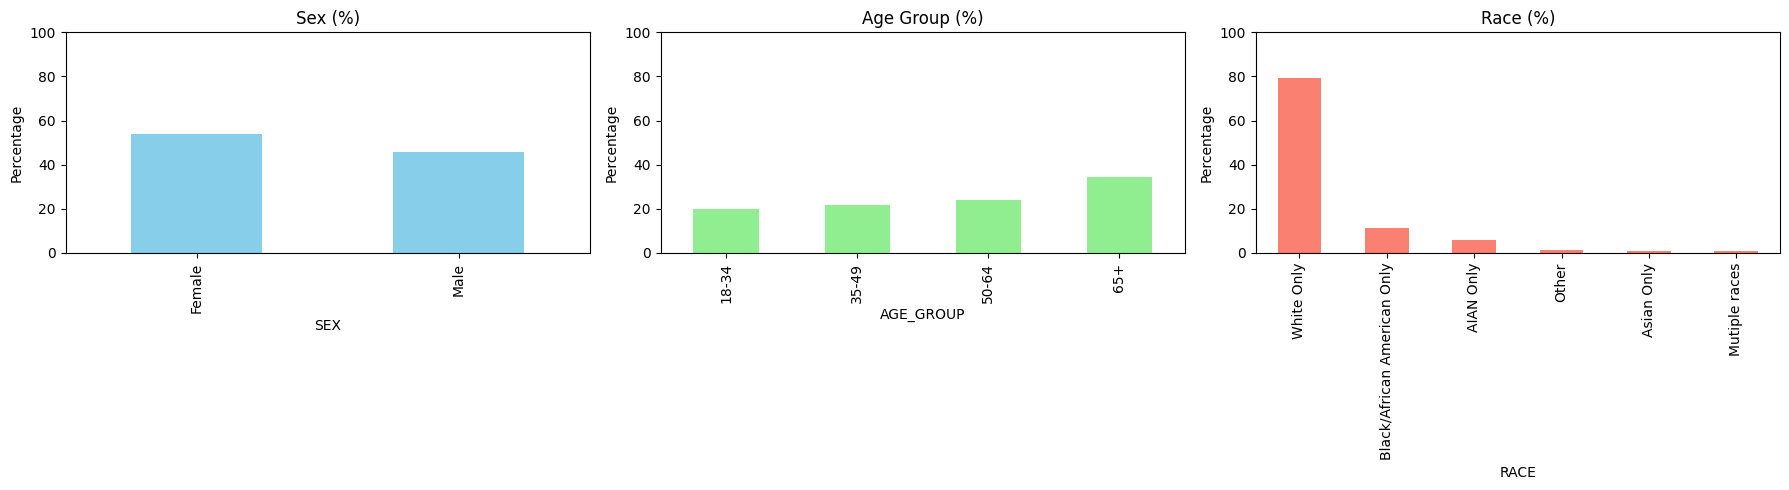

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'adult24.csv'
df = pd.read_csv(file_path)

df = df[['SEX_A','AGEP_A', 'RACEALLP_A']]

df = df[~df['SEX_A'].isin([7,9])]
df = df[~df['AGEP_A'].isin([97, 98, 99])]
df = df[~df['RACEALLP_A'].isin([7, 8, 9])]

def age_group(age):
  if age < 18:
      return '<18'
  elif 18 <= age <= 34:
      return '18-34'
  elif 35 <= age <= 49:
      return '35-49'
  elif 50 <= age <= 64:
      return '50-64'
  elif age >= 65:
      return '65+'
  return None

df['AGE_GROUP'] = df['AGEP_A'].apply(age_group)

sex_labels = {1: 'Male', 2: 'Female'}
race_labels = {
    1: 'White Only',
    2: 'Black/African American Only',
    3: 'AIAN Only',
    4: 'Asian Only',
    5: 'Mutiple races',
    6: 'Other'

}

df['SEX'] = df['SEX_A'].map(sex_labels)
df['RACE'] = df['RACEALLP_A'].map(race_labels)

sex_pct = df['SEX'].value_counts(normalize=True).mul(100).round(1)
age_pct = df['AGE_GROUP'].value_counts(normalize=True).mul(100).round(1)
race_pct = df['RACE'].value_counts(normalize=True).mul(100).round(1)

summary_table = pd.DataFrame({
    'Sex (%)': sex_pct,
    'Age Group (%)': age_pct,
    'Race (%)': race_pct
}).fillna('')

print("=== Table 1: Demographics Breakdown (Percent) ===")
print(summary_table)

fig, axs = plt.subplots(1, 3, figsize=(18,5))

sex_pct.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Sex (%)')
axs[0].set_ylabel('Percentage')
axs[0].set_ylim(0, 100)

age_pct.sort_index().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Age Group (%)')
axs[1].set_ylabel('Percentage')
axs[1].set_ylim(0, 100)

race_pct.plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Race (%)')
axs[2].set_ylabel('Percentage')
axs[2].set_ylim(0, 100)

plt.tight_layout()
plt.show